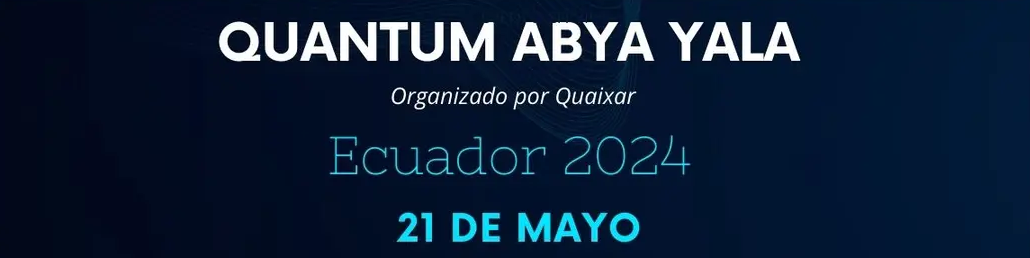

$$ $$
<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="6" color="#00356E">Quantum Machine Learning</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="5" color="#0433BF">Construyendo un clasificador cuántico variacional</font></td>
    </tr>
</table>

</br>
<p style="text-align:right; font-weight:normal; color:#042962;">Por Claudia Zendejas-Morales</p>

</br>

<table style="background-color: transparent;" align="right">
    <tr style="background-color: transparent;">
        <td width="100%">
            <a target="_blank" href="https://opensource.org/licenses/Apache-2.0">
              <img src="https://img.shields.io/badge/license-Apache--2.0-green" alt="Licencia Apache 2.0">
            </a>
            &#160;&#160;
            <a target="_blank" href="https://colab.research.google.com/drive/1RvMM3qVvj0aaU-8C9lq_m7K6CK5PbjRy?usp=sharing">
              <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
            </a>
        </td>
    </tr>
</table>

$$ $$

## Algoritmos Variacionales

Los **algoritmos variacionales** son una clase de métodos utilizados en _computación cuántica_ para resolver problemas de optimización, simulación y otras tareas complejas. Estos algoritmos combinan lo mejor de los enfoques clásicos y cuánticos, aprovechando las capacidades de las computadoras cuánticas de manera efectiva, incluso con el hardware cuántico ruidoso disponible actualmente.

- Los algoritmos variacionales son híbridos porque combinan componentes clásicos y cuánticos. Una parte del algoritmo se ejecuta en una computadora cuántica, y otra parte se ejecuta en una computadora clásica.
- La computadora cuántica se utiliza para preparar y medir estados cuánticos, mientras que la computadora clásica se utiliza para ajustar los parámetros del circuito cuántico basado en los resultados de las mediciones.


Se define una **función de costo** que el algoritmo intenta minimizar (o maximizar). Esta función de costo generalmente está relacionada con el problema específico que se quiere resolver, como la energía de un sistema molecular en química cuántica.
Los parámetros del circuito cuántico se ajustan iterativamente para minimizar (o maximizar) esta función de costo.

Después de cada medición cuántica, los resultados se envían a la computadora clásica, que calcula cómo ajustar los parámetros del circuito cuántico.
Este ciclo de ajustes se repite hasta que el algoritmo converge a una solución óptima o suficientemente buena.

$$ $$
### Ventajas y Desafíos

**Ventajas**:
- Pueden aprovechar el **paralelismo cuántico** y las propiedades cuánticas como la **superposición** y el **entrelazamiento** para explorar espacios de solución más rápidamente que los algoritmos clásicos.
- Funcionan **bien con el hardware cuántico ruidoso** disponible actualmente.

**Desafíos**:
- Requieren **algoritmos de optimización clásicos eficientes** para ajustar los parámetros del circuito cuántico.
- Sensibles al ruido y a los errores en los qubits, lo que puede afectar la precisión de las soluciones.

$$ $$
$$ $$
$$ $$
## Ejemplo sencillo de Algoritmo Variacional

Vamos a hacer un algoritmo capaz de encontrar un solo parámetro que define a un estado cuántico de un qubit.

Inicialmente queremos encontrar los grados para rotar un qubit que comienza en el estado $|0\rangle$ de modo que llegue al estado $|1\rangle$, haciendo una rotación alrededor del eje $y$.

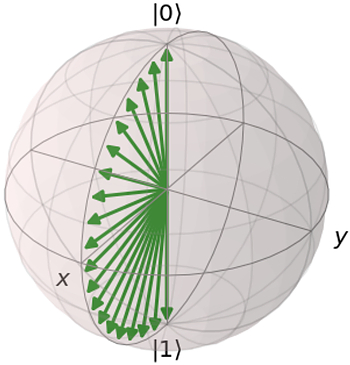

In [1]:
import pennylane as qml
from pennylane import numpy as np

In [2]:
dev = qml.device("default.qubit", wires=1)     # un dispositivo con un solo qubit

@qml.qnode(dev)                                # definir un nodo cuántico (quantum node)
def circuito(alfa):                            # encapsula una función cuántica, como un circuito cuántico
    
    qml.RY(alfa, wires=0)                      # rotación alrededor del eje 'y' por una cantidad de 'alfa' grados
    
    return qml.expval(qml.PauliZ(0))           # regresar el valor esperado del qubit


def costo(x):                                  # función de costo
    return circuito(x)                         # directamente regresamos el valor esperado que regresa el circuito cuántico

In [3]:
drawer = qml.draw(circuito)
print(drawer(0.0))

0: ──RY(0.00)─┤  <Z>


In [4]:
initial_guess = np.array(0.11, requires_grad=True)           # estimación inicial

opt = qml.GradientDescentOptimizer(stepsize=0.4)             # definir el optimizador (Gradiente Descendiente)

pasos = 30                                                   # cantidad de pasos para el entrenamiento

param = initial_guess                                        # indicar el(los) parámetro(s) iniciales

costo_cada_cinco_pasos = [costo(param)]
param_cada_cinco_pasos = [param]

for i in range(pasos):
    
    param = opt.step(costo, param)                           # actualizar el(los) parámetro(s) del circuito

    if (i + 1) % 5 == 0:
        c = costo(param)
        costo_cada_cinco_pasos.append(c)
        param_cada_cinco_pasos.append(param)
        print("Costo después del paso {:5d}: {: .7f}".format(i + 1, c))

print("\nÁngulo de rotación optimizado: {}".format(param))

Costo después del paso     5:  0.8354150
Costo después del paso    10: -0.6093256
Costo después del paso    15: -0.9966018
Costo después del paso    20: -0.9999794
Costo después del paso    25: -0.9999999
Costo después del paso    30: -1.0000000

Ángulo de rotación optimizado: 3.1415538343994647


$$ $$
Graficamos la función de costo y cómo la optimización fue variando para encontrar el mínimo:

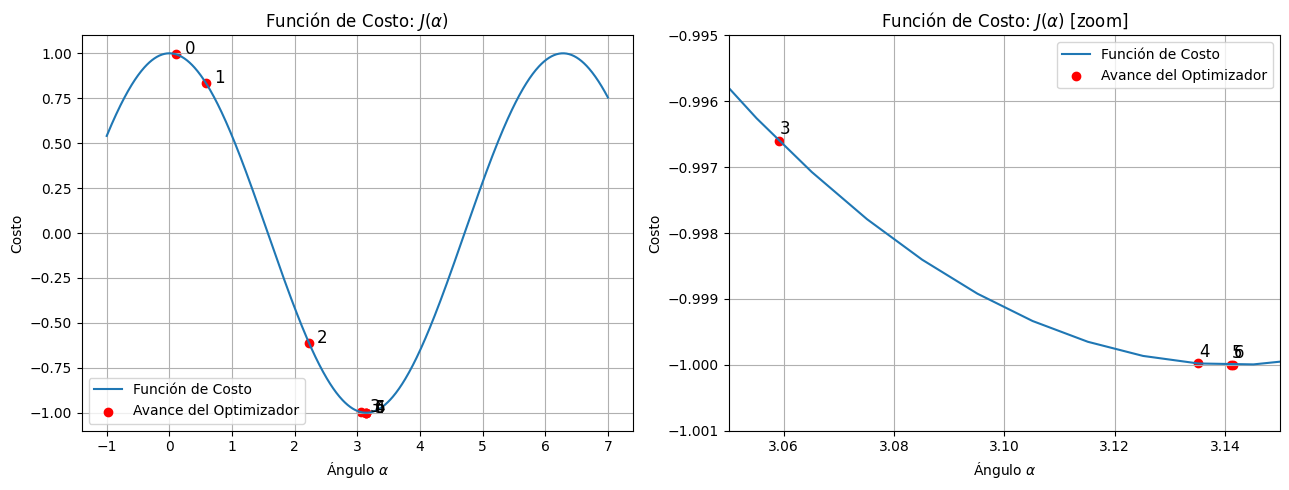

In [5]:
import matplotlib.pyplot as plt


x_values = np.linspace(-1, 7, 800)             # puntos entre -1 y 7
y_values = costo(x_values)                     # calcular los valores de la función de costo

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))


ax1.plot(x_values, y_values, label='Función de Costo')
ax1.scatter(param_cada_cinco_pasos, costo_cada_cinco_pasos, label='Avance del Optimizador', color='r')

for i, (x, y) in enumerate(zip(param_cada_cinco_pasos, costo_cada_cinco_pasos)):
    ax1.text(x+0.3, y, str(i), fontsize=12, ha='right')

ax1.set_xlabel('Ángulo $\\alpha$')
ax1.set_ylabel('Costo')
ax1.set_title('Función de Costo: $J(\\alpha)$')
ax1.legend()
ax1.grid(True)


zoom_range = (3.05, 3.15)                       # rango de zoom en el eje x
ax2.plot(x_values, y_values, label='Función de Costo')
ax2.scatter(param_cada_cinco_pasos, costo_cada_cinco_pasos, label='Avance del Optimizador', color='r')

for i, (x, y) in enumerate(zip(param_cada_cinco_pasos, costo_cada_cinco_pasos)):
    if zoom_range[0] <= x <= zoom_range[1]:
        ax2.text(x+0.002, y+0.0001, str(i), fontsize=12, ha='right')

ax2.set_xlim(zoom_range)                        # limitar el eje x al rango de zoom
ax2.set_ylim(-1.001, -0.995)                    # ajustar el eje y al rango de zoom
ax2.set_xlabel('Ángulo $\\alpha$')
ax2.set_ylabel('Costo')
ax2.set_title('Función de Costo: $J(\\alpha)$ [zoom]')
ax2.legend()
ax2.grid(True)


plt.tight_layout()
plt.show()

$$ $$
$$ $$
$$ $$
## Ejemplo: Clasificación de flores de Iris

Ahora veremos cómo usar _PennyLane_ para implementar clasificadores cuánticos variacionales: circuitos cuánticos que se pueden entrenar a partir de datos etiquetados para clasificar nuevas muestras de datos. 

Este ejemplo está inspirado en dos de los primeros artículos que propusieron **circuitos variacionales como modelos supervisados de machine learning cuántico**: [Farhi y Neven (2018)](https://arxiv.org/abs/1802.06002), así como [Schuld et al. (2018)](https://arxiv.org/abs/1804.00633).

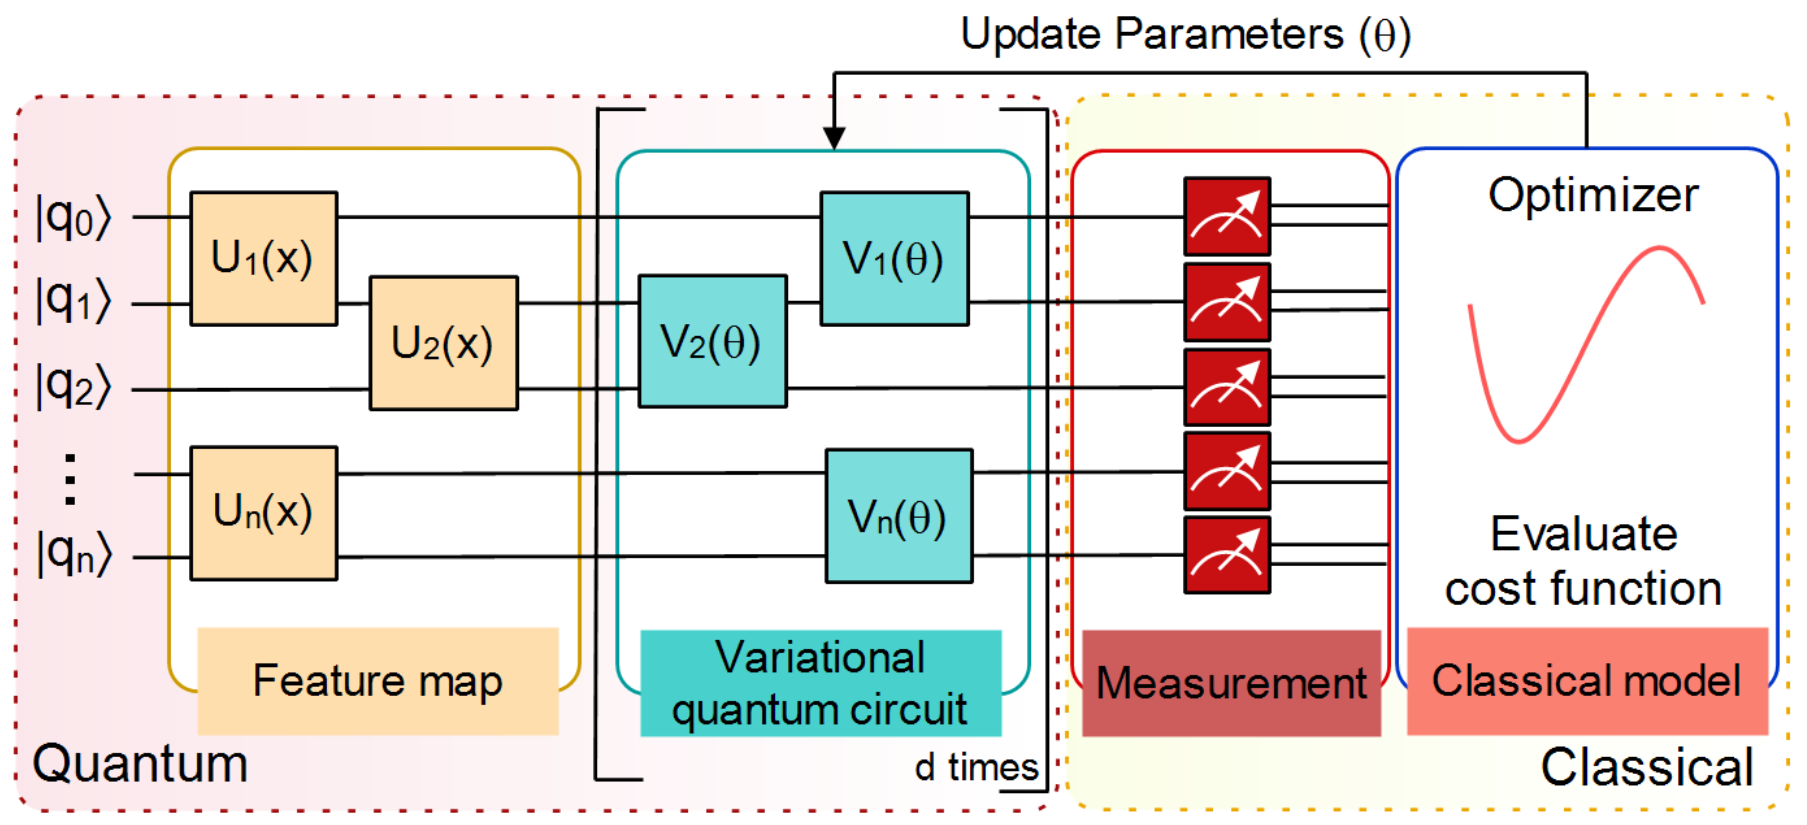

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://www.researchgate.net/publication/351813135_Variational_Quantum_Classifiers_Through_the_Lens_of_the_Hessian/references" target="_blank">Imagen obtenida de Sen y Bhatia (2021)</a></p>

$$ $$
### Importaciones

$$ $$
Comenzamos importando PennyLane, la versión de NumPy proporcionada por PennyLane y un optimizador.

In [6]:
import pennylane as qml                                        # PennyLane, nuestro paquete para QML
from pennylane import numpy as np                              # la versión NumPy de PennyLane
from pennylane.optimize import NesterovMomentumOptimizer       # el optimizador que usaremos

$$ $$
Creamos un dispositivo cuántico que ejecutará nuestros circuitos:

In [7]:
dev = qml.device("default.qubit")   # notemos que no estamos especificando la cantidad de qubits a usar

$$ $$
### Problema

$$ $$
Aquí mostraremos cómo codificar vectores reales como **vectores de amplitud en estados cuánticos** (_codificación de amplitud_) y cómo entrenar un circuito variacional para reconocer las dos primeras clases de flores en el conjunto de datos de Iris, usando la información del sépalo.

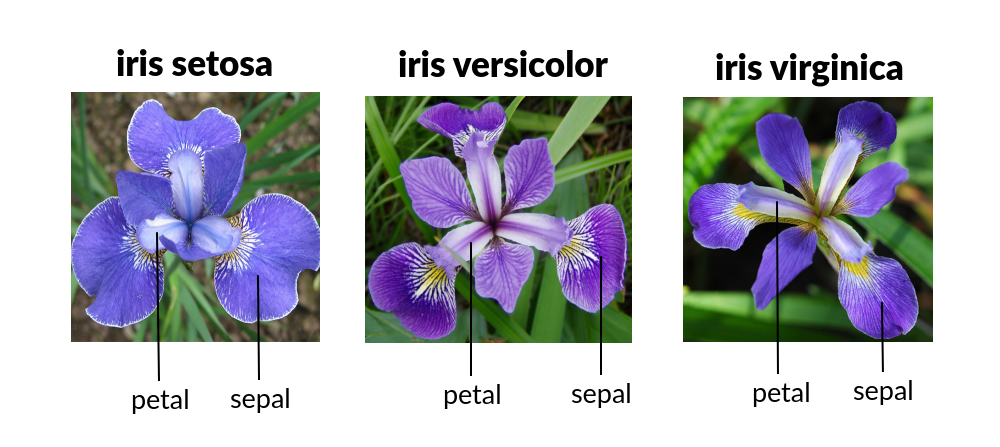

Los vectores son bidimensionales, pero agregaremos algunas "dimensiones latentes" y, por lo tanto, codificaremos las entradas en 2 qubits.

**Nota**: una "dimensión latente" (_latent dimension_) se refiere a una variable no observable directamente que se infiere a partir de los datos observables. Estas dimensiones latentes suelen ser características o factores subyacentes que explican patrones o estructuras en los datos de entrada.

$$ $$
### Codificación de datos

$$ $$
Para la preparación del estado, tomamos cada entrada $X$ que debe traducirse en un conjunto de ángulos que puedan incorporarse a una pequeña rutina para la preparación del estado. Para simplificar un poco las cosas, trabajaremos con datos del subespacio positivo, de modo que podamos ignorar los signos (lo que requeriría otra cascada de rotaciones alrededor del eje $z$).

El circuito está codificado según el esquema de [Möttönen, et al. (2004)](https://arxiv.org/abs/quant-ph/0407010) o, como se presenta solo para vectores positivos, en [Schuld y Petruccione (2018)](https://link.springer.com/book/10.1007/978-3-319-96424-9). También descompondremos las rotaciones controladas en el eje $y$ en compuertas más básicas, siguiendo a [Nielsen y Chuang (2010)](http://www.michaelnielsen.org/qcqi/).

In [8]:
def get_angles(x):                          # convertir los datos originales en valores que representan ángulos
                                            # 'x' es un arreglo con 4 valores
    
    beta0 = 2 * np.arcsin(np.sqrt(x[1] ** 2) / np.sqrt(x[0] ** 2 + x[1] ** 2 + 1e-12))
    beta1 = 2 * np.arcsin(np.sqrt(x[3] ** 2) / np.sqrt(x[2] ** 2 + x[3] ** 2 + 1e-12))
    beta2 = 2 * np.arcsin(np.linalg.norm(x[2:]) / np.linalg.norm(x))

    return np.array([beta2, -beta1 / 2, beta1 / 2, -beta0 / 2, beta0 / 2])




def state_preparation(a):                    # Mapa de características (Feature Map)
                                             # 'a' es un arreglo con 5 valores
    
    qml.RY(a[0], wires=0)

    qml.CNOT(wires=[0, 1])
    qml.RY(a[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[2], wires=1)

    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[3], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[4], wires=1)
    qml.PauliX(wires=0)

Probemos si esta rutina realmente funciona:

In [9]:
x = np.array([0.53896774, 0.79503606, 0.27826503, 0.0], requires_grad=False)
ang = get_angles(x)


@qml.qnode(dev)
def test(angles):
    state_preparation(angles)
    return qml.state()


state = test(ang)

print("x                  : ", np.round(x, 6))
print("ángulos            : ", np.round(ang, 6))
print("vector de amplitud : ", np.round(np.real(state), 6))     # la suma del cuadrado de los valores absolutos de los elementos es igual a 1

x                  :  [0.538968 0.795036 0.278265 0.      ]
ángulos            :  [ 0.563975 -0.        0.       -0.975046  0.975046]
vector de amplitud :  [ 0.538968  0.795036  0.278265 -0.      ]


$$ $$
Veamos cómo es el circuito del _mapa de características_:

In [10]:
drawer = qml.draw(test)
print(drawer(ang))

0: ──RY(0.56)─╭●────────────╭●──X────────╭●────────────╭●──X────────┤  State
1: ───────────╰X──RY(-0.00)─╰X──RY(0.00)─╰X──RY(-0.98)─╰X──RY(0.98)─┤  State


$$ $$
### Cargar datos

$$ $$
$$ $$
Cargamos el **conjunto de datos de Iris**. Hay que realizar un poco de preprocesamiento para codificar las entradas en las amplitudes de un estado cuántico. Aumentaremos los puntos de datos en dos "dimensiones latentes", haciendo que el tamaño del punto de datos _rellenado_ coincida con el tamaño del vector de estado en el dispositivo cuántico. Luego necesitamos normalizar los puntos de datos y, finalmente, traduciremos las entradas $X$ a ángulos de rotación.

El preprocesamiento de datos siempre debe realizarse teniendo en cuenta el problema; por ejemplo, si no agregamos ninguna dimensión latente, la normalización borra cualquier información sobre la longitud de los vectores y las clases separadas por esta característica no serán distinguibles.

In [11]:
data = np.loadtxt("iris_classes1and2_scaled.txt")
X = data[:, 0:2]
print(f"Primera muestra X (original)     : {X[0]}")

# rellenar los vectores al tamaño 2^2=4 con valores constantes
padding = np.ones((len(X), 2)) * 0.1
X_pad = np.c_[X, padding]
print(f"Primera muestra X (rellenada)    : {X_pad[0]}")

# normalizar cada entrada
normalization = np.sqrt(np.sum(X_pad**2, -1))
X_norm = (X_pad.T / normalization).T
print(f"Primera muestra X (normalizada)  : {X_norm[0]}")

# los ángulos para la preparación del estado son las características.
features = np.array([get_angles(x) for x in X_norm], requires_grad=False)
print(f"Primera muestra: características : {features[0]}")

Y = data[:, -1]    # el último valor contiene la clasificación

Primera muestra X (original)     : [0.4  0.75]
Primera muestra X (rellenada)    : [0.4  0.75 0.1  0.1 ]
Primera muestra X (normalizada)  : [0.46420708 0.87038828 0.11605177 0.11605177]
Primera muestra: características : [ 0.32973573 -0.78539816  0.78539816 -1.080839    1.080839  ]


$$ $$
Estos ángulos son nuestras nuevas características, por eso hemos cambiado el nombre de $X$ a "características". Grafiquemos las etapas de preprocesamiento y juguemos con las dimensiones (`dim1`, `dim2`). Algunos de ellos todavía separan bien las clases, mientras que otros son menos informativos.

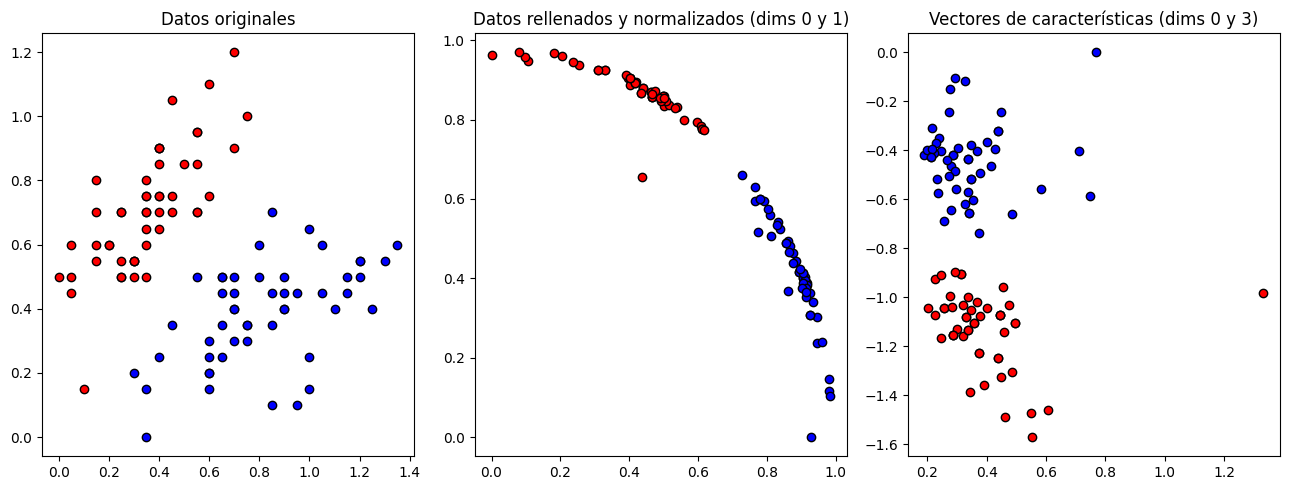

In [12]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))


ax1.scatter(X[:, 0][Y == 1], X[:, 1][Y == 1], c="b", marker="o", ec="k")
ax1.scatter(X[:, 0][Y == -1], X[:, 1][Y == -1], c="r", marker="o", ec="k")
ax1.set_title("Datos originales")

dim1 = 0
dim2 = 1
ax2.scatter(X_norm[:, dim1][Y == 1], X_norm[:, dim2][Y == 1], c="b", marker="o", ec="k")
ax2.scatter(X_norm[:, dim1][Y == -1], X_norm[:, dim2][Y == -1], c="r", marker="o", ec="k")
ax2.set_title(f"Datos rellenados y normalizados (dims {dim1} y {dim2})")

dim1 = 0
dim2 = 3
ax3.scatter(features[:, dim1][Y == 1], features[:, dim2][Y == 1], c="b", marker="o", ec="k")
ax3.scatter(features[:, dim1][Y == -1], features[:, dim2][Y == -1], c="r", marker="o", ec="k")
ax3.set_title(f"Vectores de características (dims {dim1} y {dim2})")

plt.tight_layout()
plt.show()

$$ $$
Queremos generalizar a partir de las muestras de datos. Esto significa que queremos entrenar nuestro modelo con un conjunto de datos y probar su rendimiento en un segundo conjunto de datos que no se ha utilizado en el entrenamiento. Para monitorear el desempeño de la generalización, los datos se dividen en conjuntos de entrenamiento y validación.

In [13]:
np.random.seed(0)
num_data = len(Y)
num_train = int(0.75 * num_data)
index = np.random.permutation(range(num_data))
feats_train = features[index[:num_train]]
Y_train = Y[index[:num_train]]
feats_val = features[index[num_train:]]
Y_val = Y[index[num_train:]]

# Los necesitaremos más adelante para graficar
X_train = X[index[:num_train]]
X_val = X[index[num_train:]]

$$ $$
### Parte variacional

$$ $$
Los clasificadores variacionales suelen definir una "capa" (_layer_) o "bloque", que es una arquitectura de circuito elemental que se repite para construir el circuito variacional completo.

Nuestra capa de circuito utilizará dos qubits, o `wires`, y constará de una rotación arbitraria en cada qubit, así como de una compuerta $CNOT$ que entrelazará ambos qubits, llamamos pesos o `weights` a los parámetros de la capa.

La rotación arbitraria está dada por:

$$R(\phi,\theta,\omega)=Rz(\omega)Ry(\theta)Rx(\phi)=\pmatrix{e^{-i(\phi+\omega)/2}\cos\left(\frac{\theta}{2}\right) & -e^{i(\phi-\omega)/2}\sin\left(\frac{\theta}{2}\right)\\e^{-i(\phi-\omega)/2}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\omega)/2}\cos\left(\frac{\theta}{2}\right)}$$

$$ $$

In [14]:
def layer(layer_weights):
    for wire in range(2):
        qml.Rot(*layer_weights[wire], wires=wire)
    qml.CNOT(wires=[0, 1])

In [15]:
drawer = qml.draw(layer)
print(drawer((0.01 * np.random.randn(1, 2, 3, requires_grad=True))[0]))

0: ──Rot(0.00,-0.00,0.01)──╭●─┤  
1: ──Rot(0.01,-0.00,-0.01)─╰X─┤  


$$ $$
Ahora definimos el **circuito cuántico variacional** con la rutina de preparación de estados, seguida de una repetición de la estructura de capas.

In [16]:
@qml.qnode(dev)
def circuit(weights, x):                   # circuito cuántico variacional
    
    state_preparation(x)                   # preparación de estados (codificación en amplitudes)

    for layer_weights in weights:          # parte variacional, con len(weights) capas
        layer(layer_weights)

    return qml.expval(qml.PauliZ(0))       # medición al final del circuito

$$ $$
Si queremos agregar un parámetro de sesgo "clásico" (_**bias**_), el clasificador cuántico variacional también necesita algo de posprocesamiento. Definimos el modelo completo como la suma de la salida del circuito cuántico, más el sesgo entrenable.

**Nota**: El parámetro _bias_ es importante para permitir el ajuste adecuado del modelo a los datos, proporcionando flexibilidad para que la función se adapte y así mejorar el rendimiento del modelo. Sin el bias, la capacidad del modelo para aprender y representar correctamente los datos sería significativamente limitada.

In [17]:
def variational_classifier(weights, bias, x):
    return circuit(weights, x) + bias

$$ $$
### Costo

$$ $$
En el aprendizaje supervisado, la función de costo suele ser la suma de una función de pérdida y un regularizador. Nos limitamos a la pérdida cuadrada estándar que mide la distancia entre las etiquetas de destino y las predicciones del modelo.

In [18]:
def square_loss(labels, predictions):
    # usamos una llamada a 'qml.math.stack' para permitir restar las matrices directamente
    return np.mean((labels - qml.math.stack(predictions)) ** 2)

$$ $$
Para las tareas de aprendizaje, el costo depende de los datos: aquí, las características y etiquetas consideradas en la iteración de la rutina de optimización.

Definimos la función de costo para pasar el lote completo de datos al estado de preparación del circuito simultáneamente, una técnica similar al _broadcasting_ NumPy.

In [19]:
def cost(weights, bias, X, Y):
    # transponer el lote de datos de entrada para que la indexación
    # en 'state_preparation' funcione
    predictions = variational_classifier(weights, bias, X.T)
    return square_loss(Y, predictions)

$$ $$
Para monitorear cuántas entradas predijo correctamente el clasificador actual, también definimos la precisión o la proporción de predicciones que concuerdan con un conjunto de etiquetas objetivo.

In [20]:
def accuracy(labels, predictions):
    acc = sum(abs(l - p) < 1e-5 for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc

$$ $$
### Optimización

$$ $$
Inicializamos las variables aleatoriamente (pero fijamos una semilla para la reproducibilidad). Recordemos que una de las variables se utiliza como _bias_, mientras que el resto se introduce en las compuertas del circuito variacional.

In [21]:
num_qubits = 2
num_layers = 6

np.random.seed(0)

weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

$$ $$
A continuación, creamos una instancia del optimizador y elegimos un tamaño de lote.

In [22]:
opt = NesterovMomentumOptimizer(0.01)            # param: tamaño del paso (step size) o tasa de aprendizaje (learning rate)
batch_size = 5

$$ $$
Minimizamos el costo utilizando el optimizador importado; es decir, entrenamos el modelo.

Realizamos un seguimiento de la precisión: la proporción de muestras de datos clasificadas correctamente.

In [23]:
# entrenar el clasificador variacional

weights = weights_init
bias = bias_init

steps = 50

for it in range(steps):
    
    # actualizar los pesos en cada paso del optimizador
    batch_index = np.random.randint(0, num_train, (batch_size,))
    feats_train_batch = feats_train[batch_index]
    Y_train_batch = Y_train[batch_index]
    weights, bias, _, _ = opt.step(cost, weights, bias, feats_train_batch, Y_train_batch)    # ejecutamos el paso en la optimización

    # calcular las predicciones sobre los conjuntos de entrenamiento y validación
    predictions_train = np.sign(variational_classifier(weights, bias, feats_train.T))
    predictions_val = np.sign(variational_classifier(weights, bias, feats_val.T))

    # calcular la precisión en los conjuntos de entrenamiento y validación
    acc_train = accuracy(Y_train, predictions_train)
    acc_val = accuracy(Y_val, predictions_val)

    if (it + 1) % 2 == 0:
        _cost = cost(weights, bias, features, Y)
        print(
            f"Iteración: {it + 1:5d} | Costo: {_cost:0.7f} | "
            f"Precisión entrenamiento: {acc_train:0.7f} | Precisión validación: {acc_val:0.7f}"
        )

Iteración:     2 | Costo: 1.5902883 | Precisión entrenamiento: 0.4800000 | Precisión validación: 0.5600000
Iteración:     4 | Costo: 1.1174922 | Precisión entrenamiento: 0.4800000 | Precisión validación: 0.5600000
Iteración:     6 | Costo: 0.9843993 | Precisión entrenamiento: 0.6000000 | Precisión validación: 0.5600000
Iteración:     8 | Costo: 1.0423279 | Precisión entrenamiento: 0.5200000 | Precisión validación: 0.4400000
Iteración:    10 | Costo: 1.0218108 | Precisión entrenamiento: 0.5200000 | Precisión validación: 0.4400000
Iteración:    12 | Costo: 0.9356691 | Precisión entrenamiento: 0.6266667 | Precisión validación: 0.6400000
Iteración:    14 | Costo: 0.9096414 | Precisión entrenamiento: 0.6400000 | Precisión validación: 0.6400000
Iteración:    16 | Costo: 0.9302410 | Precisión entrenamiento: 0.5333333 | Precisión validación: 0.4800000
Iteración:    18 | Costo: 0.9318180 | Precisión entrenamiento: 0.5333333 | Precisión validación: 0.4400000
Iteración:    20 | Costo: 0.9157123 |

$$ $$
Como podemos ver, el clasificador variacional "aprendió" a clasificar correctamente todos los datos del conjunto de entrenamiento.

Pero a diferencia de la optimización, en el machine learning el objetivo es generalizar desde datos limitados hasta ejemplos no vistos con anterioridad. Incluso si el circuito cuántico variacional estuviera perfectamente optimizado con respecto al costo, podría no generalizarse, un fenómeno conocido como _sobreajuste_. El arte del machine learning (cuántico) consiste en crear modelos y procedimientos de aprendizaje que tiendan a encontrar mínimos "buenos", o que conduzcan a modelos que se generalicen bien.

Grafiquemos la salida continua del clasificador variacional para las dos primeras dimensiones del conjunto de datos de Iris:

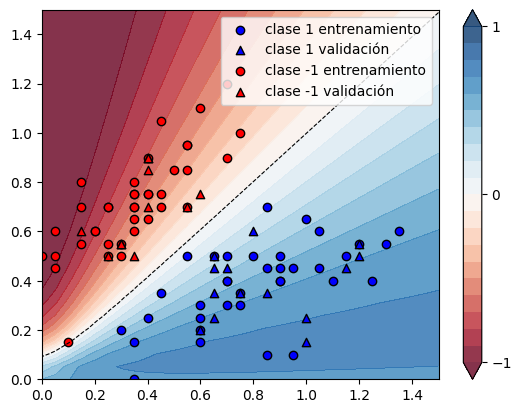

In [24]:
plt.figure()
cm = plt.cm.RdBu

# generar datos para regiones de decisión

xx, yy = np.meshgrid(np.linspace(0.0, 1.5, 30), np.linspace(0.0, 1.5, 30))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]



# preprocesar los puntos del grid del mismo modo que los datos de entrada

padding = 0.1 * np.ones((len(X_grid), 2))
X_grid = np.c_[X_grid, padding]                                                         # rellenar cada entrada
normalization = np.sqrt(np.sum(X_grid**2, -1))
X_grid = (X_grid.T / normalization).T                                                   # normalizar cada entrada
features_grid = np.array([get_angles(x) for x in X_grid])                               # los ángulos son características nuevas
predictions_grid = variational_classifier(weights, bias, features_grid.T)
Z = np.reshape(predictions_grid, xx.shape)


# graficar regiones de decisión

levels = np.arange(-1, 1.1, 0.1)
cnt = plt.contourf(xx, yy, Z, levels=levels, cmap=cm, alpha=0.8, extend="both")
plt.contour(xx, yy, Z, levels=[0.0], colors=("black",), linestyles=("--",), linewidths=(0.8,))
plt.colorbar(cnt, ticks=[-1, 0, 1])


# graficar los datos

for color, label in zip(["b", "r"], [1, -1]):
    plot_x = X_train[:, 0][Y_train == label]
    plot_y = X_train[:, 1][Y_train == label]
    plt.scatter(plot_x, plot_y, c=color, marker="o", ec="k", label=f"clase {label} entrenamiento")
    plot_x = (X_val[:, 0][Y_val == label],)
    plot_y = (X_val[:, 1][Y_val == label],)
    plt.scatter(plot_x, plot_y, c=color, marker="^", ec="k", label=f"clase {label} validación")

plt.legend()
plt.show()

Encontramos que el clasificador variacional "aprendió" una línea separadora entre los puntos de datos de las dos clases diferentes, lo que le permite clasificar incluso los datos de validación no vistos previamente (ocultos) con alta precisión.